## UVOD 

# UVOZ PODATKOV 


In [230]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [133]:
podatki_venezia = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\\venezia.csv')
podatki_bergamo = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\\bergamo.csv')
podatki_dest_z_drzavami = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\\veneziabergamo.total.csv', sep=';')
letalske_druzbe = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\letalska_druzba.csv')


Doda teden leta:

In [134]:
podatki_venezia['datum']= pd.to_datetime(podatki_venezia['datum'], dayfirst=True)
podatki_bergamo['datum']= pd.to_datetime(podatki_bergamo['datum'], dayfirst=True)

In [135]:
podatki_venezia['teden'] = podatki_venezia.datum.dt.strftime('%V')
podatki_bergamo['teden'] = podatki_bergamo.datum.dt.strftime('%V')

In [136]:
podatki_venezia

,id,destinacija,datum,dan,cas,teden
0,v1,Amman,2022-11-02,SRE,5:10,44
1,v2,Amman,2022-11-09,SRE,5:10,45
2,v3,Amman,2022-11-16,SRE,5:10,46
3,v4,Amman,2022-11-23,SRE,5:10,47
4,v5,Amman,2022-11-30,SRE,5:10,48
...,...,...,...,...,...,...
11775,v11776,Zurich,2023-03-18,SOB,1:20,11
11776,v11777,Zurich,2023-03-07,TOR,1:20,10
11777,v11778,Zurich,2023-03-14,TOR,1:20,11
11778,v11779,Zurich,2023-03-21,TOR,1:20,12


In [137]:
zdruzeni_benetke = pd.merge(podatki_venezia, podatki_dest_z_drzavami, on=['id', 'destinacija'])
zdruzeni_bergamo = pd.merge(podatki_bergamo, podatki_dest_z_drzavami, on=['id', 'destinacija'])

Zacetni podatki:

In [138]:
zdruzeni_bergamo 

,id,destinacija,datum,dan,cas,teden,Aiport,Država
0,b1,Agadir,2022-11-01,TOR,2:40,44,Bergamo,Maroko
1,b2,Agadir,2022-11-05,SOB,2:40,44,Bergamo,Maroko
2,b3,Agadir,2022-11-08,TOR,2:40,45,Bergamo,Maroko
3,b4,Agadir,2022-11-12,SOB,3:40,45,Bergamo,Maroko
4,b5,Agadir,2022-11-15,TOR,3:40,46,Bergamo,Maroko
...,...,...,...,...,...,...,...,...
11367,b11368,Zaragoza,2023-03-20,PON,1:55,12,Bergamo,Španija
11368,b11369,Zaragoza,2023-03-24,PET,1:55,12,Bergamo,Španija
11369,b11370,Zaragoza,2023-03-26,NED,1:50,12,Bergamo,Španija
11370,b11371,Zaragoza,2023-03-28,TOR,1:50,13,Bergamo,Španija


Razlikovanje prazničnih tednov od preostalih:

In [153]:
value_counts_venice = podatki_venezia["teden"].value_counts()
zadnji_teden_ve = value_counts_venice["52"]
prvi_teden_ve = value_counts_venice["01"]
povprecje_dveh_ve =(prvi_teden_ve + zadnji_teden_ve)//2
podatki_filtered_ve = podatki_venezia[(podatki_venezia["teden"] != "52") & (podatki_venezia["teden"] != "01")]
preostali_tedni_ve = podatki_filtered_ve.groupby("teden").size()
benetke_rez = povprecje_dveh_ve / (preostali_tedni_ve.mean())- 1 #15% vec kot povprecje v ostalih tednih
benetke_rez

0.15403655750190404

In [155]:
value_counts_bergamo = podatki_bergamo["teden"].value_counts()
zadnji_teden_be = value_counts_bergamo["52"]
prvi_teden_be = value_counts_bergamo["01"]
povprecje_dveh_be =(prvi_teden_be+ zadnji_teden_be)//2
podatki_filtered_be = podatki_bergamo[(podatki_bergamo["teden"] != "52") & (podatki_bergamo["teden"] != "01")]
preostali_tedni_be = podatki_filtered_be.groupby("teden").size()
bergamo_rez = povprecje_dveh_be / (preostali_tedni_be.mean())- 1 
bergamo_rez

0.07950116913484018

In [144]:
po_drzavah=zdruzeni_benetke.groupby("Država").size()

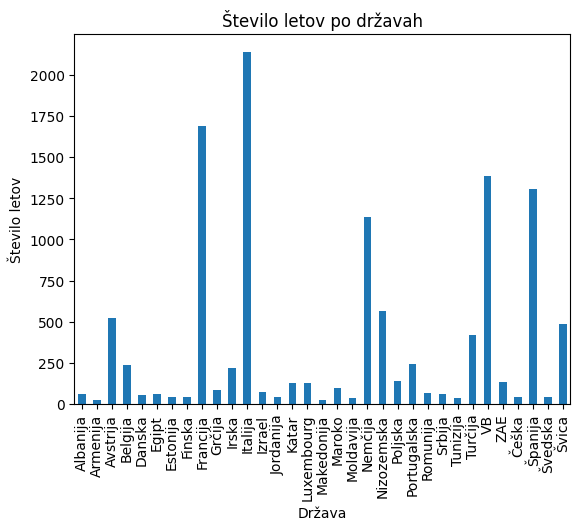

In [235]:


po_drzavah.plot(kind='bar')
plt.xlabel('Država')
plt.ylabel('Število letov')
plt.title('Število letov po državah')
plt.show()

In [146]:
zdruzeni_benetke.groupby("dan").size().sort_values(ascending=False)

dan
PET    1965
NED    1832
PON    1791
CET    1682
SOB    1602
TOR    1561
SRE    1347
dtype: int64

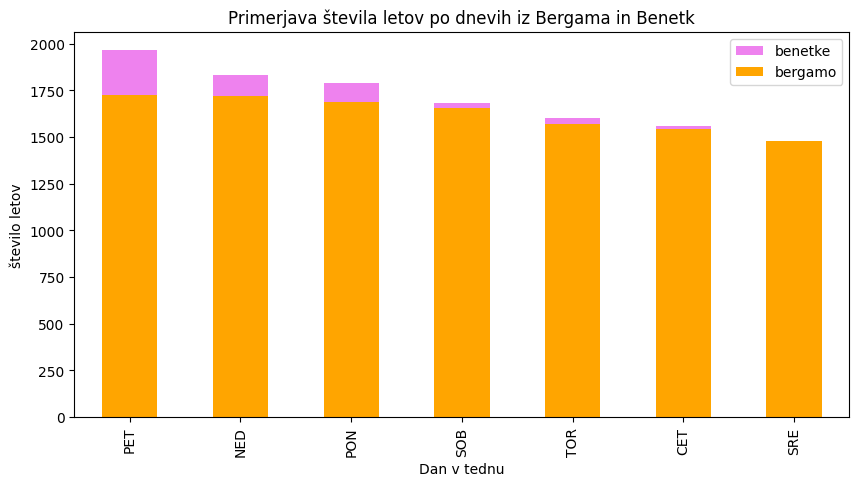

In [231]:
ax = zdruzeni_benetke.groupby("dan").size().sort_values(ascending=False).plot(kind='bar', color='violet', figsize=(10, 5))
zdruzeni_bergamo.groupby("dan").size().sort_values(ascending=False).plot(kind='bar', color='orange', ax=ax)
plt.xlabel('Dan v tednu')
plt.ylabel('število letov')
plt.title('Primerjava števila letov po dnevih iz Bergama in Benetk')
plt.legend(['benetke', 'bergamo'])
plt.show()

In [158]:
bergamo_z_letalskimi_druzbami = pd.merge(zdruzeni_bergamo, letalske_druzbe, on='id')
bergamo_z_letalskimi_druzbami

,id,destinacija,datum,dan,cas,teden,Aiport,Država,druzba,letalo
0,b1,Agadir,2022-11-01,TOR,2:40,44,Bergamo,Maroko,Ryanair,FR 3504
1,b2,Agadir,2022-11-05,SOB,2:40,44,Bergamo,Maroko,Ryanair,FR 3504
2,b3,Agadir,2022-11-08,TOR,2:40,45,Bergamo,Maroko,Ryanair,FR 3504
3,b4,Agadir,2022-11-12,SOB,3:40,45,Bergamo,Maroko,Ryanair,FR 3504
4,b5,Agadir,2022-11-15,TOR,3:40,46,Bergamo,Maroko,Ryanair,FR 3504
...,...,...,...,...,...,...,...,...,...,...
11367,b11368,Zaragoza,2023-03-20,PON,1:55,12,Bergamo,Španija,Ryanair,FR 3502
11368,b11369,Zaragoza,2023-03-24,PET,1:55,12,Bergamo,Španija,Ryanair,FR 3502
11369,b11370,Zaragoza,2023-03-26,NED,1:50,12,Bergamo,Španija,Ryanair,FR 3502
11370,b11371,Zaragoza,2023-03-28,TOR,1:50,13,Bergamo,Španija,Ryanair,FR 3502


In [161]:
skupna_tabela = pd.concat([zdruzeni_benetke, zdruzeni_bergamo], axis=0)

In [162]:
skupna_tabela

,id,destinacija,datum,dan,cas,teden,Aiport,Država
0,v1,Amman,2022-11-02,SRE,5:10,44,Benetke,Jordanija
1,v2,Amman,2022-11-09,SRE,5:10,45,Benetke,Jordanija
2,v3,Amman,2022-11-16,SRE,5:10,46,Benetke,Jordanija
3,v4,Amman,2022-11-23,SRE,5:10,47,Benetke,Jordanija
4,v5,Amman,2022-11-30,SRE,5:10,48,Benetke,Jordanija
...,...,...,...,...,...,...,...,...
11367,b11368,Zaragoza,2023-03-20,PON,1:55,12,Bergamo,Španija
11368,b11369,Zaragoza,2023-03-24,PET,1:55,12,Bergamo,Španija
11369,b11370,Zaragoza,2023-03-26,NED,1:50,12,Bergamo,Španija
11370,b11371,Zaragoza,2023-03-28,TOR,1:50,13,Bergamo,Španija


Na katere destinacije iz obeh letališč skupaj je letelo največ letov?

In [164]:
po_destinacijah =skupna_tabela.groupby("destinacija").size().sort_values(ascending=False)
najvec = po_destinacijah.head(20)
najvec


destinacija
Paris Charles de Gaulle    873
Madrid                     691
Amsterdam                  658
Catania                    626
Naples                     616
Frankfurt                  610
London Stansted            579
Barcelona                  569
Vienna                     523
Palermo                    517
Bari                       454
Istanbul                   442
Rome Fiumicino             424
London Heathrow            424
Zurich                     403
Paris Orly                 400
Istanbul Airport           365
Munich                     356
London Gatwick             338
Dublin                     327
dtype: int64

In [165]:
najmanj= po_destinacijah.tail(20)
najmanj

destinacija
Tunisi             39
Saragozza          39
Oslo Gardemoen     38
Chisinau           38
Bournemouth        29
Olbia              27
Skopje             25
Bilbao             24
Erevan             22
Alessandria        20
Lille              15
Bordeaux           14
Sharm El Sheikh    13
Hannover            8
Corfu'              6
Ibiza               6
Billund             5
Rhodes              4
Dakar               3
Stoccarda           1
dtype: int64

In [166]:
sk = skupna_tabela.groupby("destinacija")

In [178]:
sk = sk[["destinacija"]]

In [187]:
grouped = skupna_tabela.groupby("Država")

uredi= grouped.size().sort_values(ascending=False).head(10)

italija = grouped.get_group("Italija")



In [185]:
uredi

Država
Italija        3948
Španija        2754
Francija       2164
VB             2033
Nemčija        1623
Romunija       1174
Turčija         862
Nizozemska      861
Poljska         853
Portugalska     689
dtype: int64

In [188]:
italija.groupby("destinacija").size().sort_values(ascending=False).head(20)

destinacija
Catania           626
Naples            616
Palermo           517
Bari              454
Rome Fiumicino    424
Cagliari          291
Brindisi          150
Lamezia Terme     150
Trapani           150
Pescara           144
Alghero           132
Crotone           111
Roma Fiumicino    109
Comiso             47
Olbia              27
dtype: int64

In [228]:
matchy_rows = zdruzeni_benetke[zdruzeni_benetke["destinacija"].isin(zdruzeni_bergamo["destinacija"])]

In [229]:
matchy = matchy_rows.drop_duplicates(subset="destinacija")
matchy[["destinacija","Država"]]

,destinacija,Država
0,Amman,Jordanija
41,Amsterdam,Nizozemska
609,Athens,Grčija
1262,Bari,Italija
1776,Birmingham,VB
1867,Bristol,VB
2133,Cagliari,Italija
2274,Casablanca,Maroko
2370,Catania,Italija
2824,Cluj,Romunija


In [227]:
vse_dest_iz_venezie = podatki_venezia.groupby("destinacija").size()
vse_dest_iz_venezie.shape[0]

76

In [225]:
vse_dest_iz_bergama = podatki_bergamo.groupby("destinacija").size()
vse_dest_iz_bergama.shape[0]

114